# 1. Bakery Transaction - EDA

베이커리 판매 데이터의 탐색적 분석<br>
판매 품목에 대한 베이커리 데이터 [Kaggle - Transaction from a bakery](https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery)

<br>

**분석 목표**
- 베이커리 판매에 영향을 주는 요인 찾기
- 베이커리 판매량 예측하기
- 세트 상품으로 출시하면 좋을 조합 제안하기

<br>

---

<br>

[1. Introduction](##1.-Introduction) <br>
[2. Exploration](##2.-Exploration) <br>
　[2-1. 베이커리 판매량의 추이](###2-1.-베이커리-판매량의-추이)<br>
　[2-2. 베이커리의 베스트 셀러 Top 10](###2-2.-베이커리의-베스트-셀러-Top-10)<br>
　[2-3. 베스트 셀러의 시간대별 판매량 추이](###2-3.-베스트-셀러의-시간대별-판매량-추이)<br>

## 1. Introduction

베이커리 판매 데이터
- 2016년 10월 30일부터 2017년 4월 9일까지의 판매 데이터
- 총 21293개의 관측치
- 결측치 값은 NONE으로 설정
- 4개의 변수

| 변수명 | 변수 설명 | 자료 형태 |
|  :----------------------------: |  :----------------------------: |  :----------------------------: |
| Date | 거래일 | 날짜(YYYY-MM-DD) |
| Time | 거래시간 | 시간(HH:MM:DD) |
| Transaction | 거래번호 | 거래의 일련번호 |
| Item | 판매품목 | 상품명 |

**필요한 라이브러리 불러오기**

In [129]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
import matplotlib.pyplot as plt

**데이터 확인하기**

In [3]:
bakery = pd.read_csv('../input/transactions-from-a-bakery/BreadBasket_DMS.csv')
bakery.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [ ]:
bakery.shape

In [ ]:
bakery.dtypes

In [4]:
bakery['Item'].value_counts()

Coffee          5471
Bread           3325
Tea             1435
Cake            1025
Pastry           856
                ... 
Bacon              1
Raw bars           1
Chicken sand       1
Gift voucher       1
The BART           1
Name: Item, Length: 95, dtype: int64

**결측치 확인하고 처리하기**

결측치가 있는 행은 전체 삭제하여 처리해준다
- 결측치가 Na나 빈 값이 아니라 None으로 되어 있으므로 그에 맞게 처리
- 총 786개의 데이터 삭제

In [5]:
bakery[bakery['Item'] == 'NONE'].count()

Date           786
Time           786
Transaction    786
Item           786
dtype: int64

In [6]:
bakery = bakery[bakery['Item'] != 'NONE']
bakery[bakery['Item'] == 'NONE']

,Date,Time,Transaction,Item


**데이터 타입 변환**

날짜의 요일을 확인하기 위해 object 타입의 날짜와 시간을 datetime 타입으로 변환

날짜 시간 데이터에서 요일 추출해서 열 추가: `dt.weekday_name() 대신 day_name()사용`

In [7]:
bakery['Date_Time'] = pd.to_datetime(bakery['Date']+' '+bakery['Time'],format="%Y/%m/%d %H:%M:%S")
bakery['Day_of_Week'] = bakery['Date_Time'].dt.day_name()
bakery.head()

,Date,Time,Transaction,Item,Date_Time,Day_of_Week
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,Sunday
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,Sunday
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,Sunday


## 2. Exploration

### 2-1. 베이커리 판매량의 추이

**날짜 별 판매량 추이**

In [8]:
bakery['Date'].value_counts().head()

2017-02-04    292
2016-11-05    275
2017-03-04    257
2017-03-25    246
2017-01-28    237
Name: Date, dtype: int64

날짜 별로 묶어주기

In [9]:
bakery['Date'].value_counts().max()

292

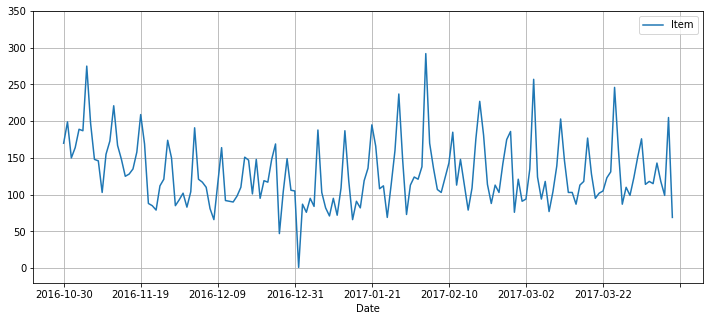

In [10]:
graph1 = bakery.groupby('Date')['Item'].count()

graph1.plot(figsize=(12,5))
plt.ylim([-20,350])
plt.grid(True)
plt.legend()

In [52]:
bakery['Month'] = bakery['Date_Time'].dt.month
bakery['Year'] = bakery['Date_Time'].dt.year
bakery.head()

,Date,Time,Transaction,Item,Date_Time,Day_of_Week,Hour,Session,Month,Year
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,Sunday,9,Morning,10,2016
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday,10,Morning,10,2016
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday,10,Morning,10,2016
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,Sunday,10,Morning,10,2016
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,Sunday,10,Morning,10,2016


In [63]:
bakery.groupby("Month")["Year"].apply(lambda x: x[x==2016].count()).max(), bakery.groupby("Month")["Year"].apply(lambda x: x[x==2017].count()).max()

(4436, 3944)

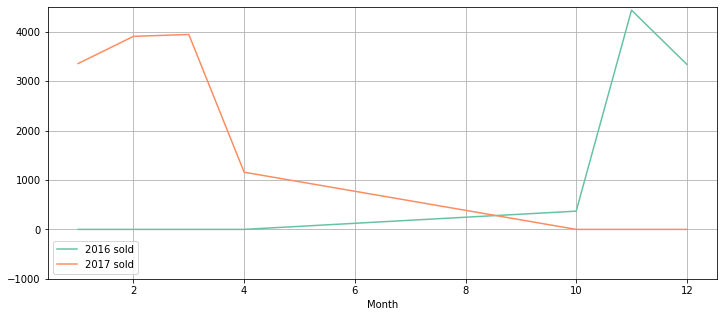

In [66]:
TC = bakery.groupby("Month")["Year"].apply(lambda x: x[x==2016].count()).rename("2016 sold").to_frame()
TC["2017 sold"] = bakery.groupby("Month")["Year"].apply(lambda x: x[x==2017].count())

TC.plot(figsize=(12,5))
plt.ylim([-1000,4500])
plt.grid(True)
plt.legend()

**요일 별 판매량 추이**

<AxesSubplot:xlabel='Day_of_Week', ylabel='count'>

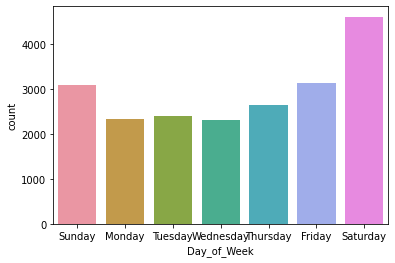

In [47]:
sns.countplot(x = 'Day_of_Week', data = bakery)

**시간대 별 판매량 추이**

In [12]:
bakery['Time'].value_counts()

12:07:39    16
10:55:19    13
14:38:01    13
10:45:21    13
13:43:08    12
            ..
09:15:45     1
11:56:35     1
17:33:05     1
15:41:22     1
14:22:18     1
Name: Time, Length: 8197, dtype: int64

In [17]:
bakery['Hour'] = bakery['Date_Time'].dt.hour
bakery.head()

,Date,Time,Transaction,Item,Date_Time,Day_of_Week,Hour
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,Sunday,9
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday,10
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday,10
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,Sunday,10
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,Sunday,10


In [19]:
bakery['Hour'].max(), bakery['Hour'].min()

(23, 1)

<AxesSubplot:xlabel='Hour', ylabel='count'>

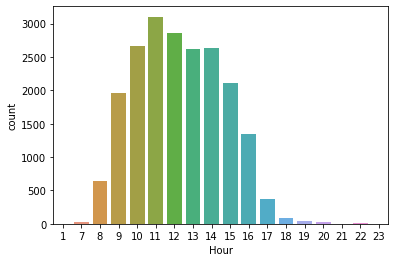

In [48]:
sns.countplot(x = 'Hour', data = bakery)

In [22]:
time_dict = {7 : 'Morning', 8 :'Morning', 9 :'Morning',10:'Morning',11:'Morning',12:'Morning',13:'Afternoon',14:'Afternoon',15:'Afternoon',16:'Afternoon',17:'Afternoon',18:'Afternoon',19:'Evening',20:'Evening',21:'Evening',22:'Evening',23:'Evening'}
bakery['Session'] = bakery['Hour'].map(time_dict)
bakery.head()

,Date,Time,Transaction,Item,Date_Time,Day_of_Week,Hour,Session
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,Sunday,9,Morning
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday,10,Morning
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday,10,Morning
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,Sunday,10,Morning
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,Sunday,10,Morning


<AxesSubplot:xlabel='Session', ylabel='count'>

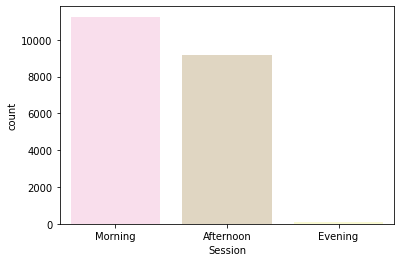

In [44]:
sns.countplot(x = 'Session', data = bakery)

### 2-2. 베이커리의 베스트 셀러 Top 10

In [41]:
bakery['Item'].value_counts().iloc[:10]

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64

<AxesSubplot:xlabel='Item', ylabel='count'>

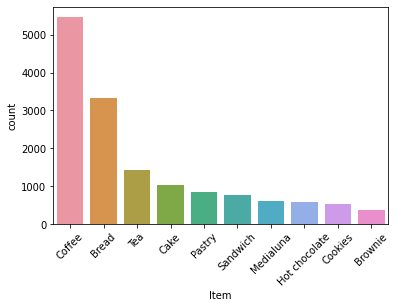

In [45]:
plt.xticks(rotation=45)
sns.countplot(x = 'Item', data = bakery, order = bakery['Item'].value_counts().iloc[:10].index)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  if __name__ == '__main__':


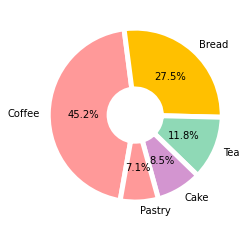

In [133]:
labels = bakery['Item'].value_counts().iloc[:5].index
values = bakery['Item'].value_counts().iloc[:5].values

ratio = values / sum(values)
ratio
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

### 2-3. 베스트 셀러의 판매량 추이

베스트 셀러: Coffee, Bread, Tea, Cake, Pastry

**Coffee의 판매량 추이**

In [72]:
bakery["Date"].value_counts()

2017-02-04    292
2016-11-05    275
2017-03-04    257
2017-03-25    246
2017-01-28    237
             ... 
2017-01-25     69
2016-12-08     66
2017-01-16     66
2016-12-27     47
2017-01-01      1
Name: Date, Length: 159, dtype: int64

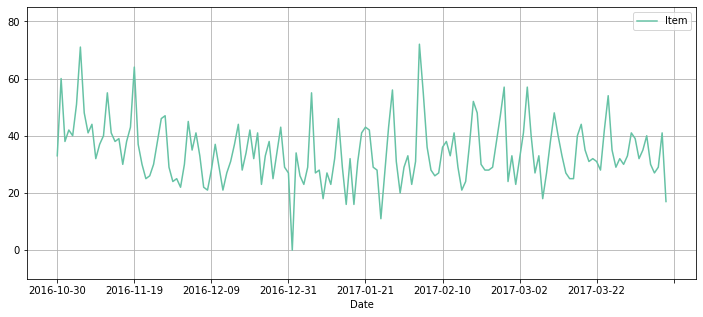

In [78]:
graph = bakery.groupby('Date')['Item'].apply(lambda x: x[x=="Coffee"].count())

graph.plot(figsize=(12,5))
plt.ylim([-10,85])
plt.grid(True)
plt.legend()

Text(0, 0.5, 'Coffee')

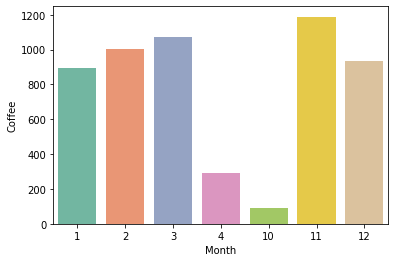

In [98]:
# .reset_index()로 인덱스를 붙여줘야 sns.barplot를 그릴 수 있다
# sns.countplot(bakery.groupby('Month')['Item'].apply(lambda x: x[x=="Coffee"].count()))도 가능
coffee_month = bakery.groupby('Month')['Item'].apply(lambda x: x[x=="Coffee"].count()).reset_index()
graph = sns.barplot(data=coffee_month, x="Month", y="Item")
graph.set_ylabel('Coffee')

Text(0, 0.5, 'Coffee')

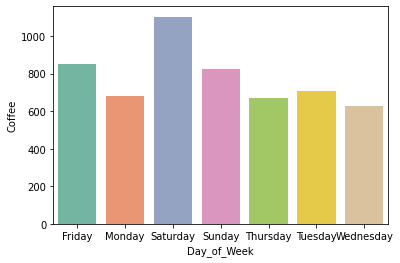

In [99]:
coffee_day = bakery.groupby('Day_of_Week')['Item'].apply(lambda x: x[x=="Coffee"].count()).reset_index()
graph = sns.barplot(data=coffee_day, x="Day_of_Week", y="Item")
graph.set_ylabel('Coffee')

In [103]:
bakery.groupby('Day_of_Week')['Item'].apply(lambda x: x[x=="Coffee"].count()).reindex(days)
coffee_day.reset_index()

,index,Day_of_Week,Item
0,0,Monday,681
1,1,Tuesday,710
2,2,Wednesday,628
3,3,Thursday,670
4,4,Friday,854
5,5,Saturday,1103
6,6,Sunday,825


Text(0, 0.5, 'Coffee')

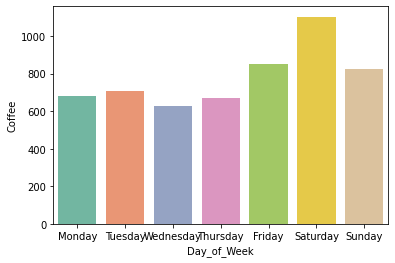

In [102]:
# 요일 순서를 내 마음대로: reindex
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
coffee_day = bakery.groupby('Day_of_Week')['Item'].apply(lambda x: x[x=="Coffee"].count()).reindex(days)
coffee_day.reset_index()
graph = sns.barplot(data=coffee_day, x="Day_of_Week", y="Item")
graph.set_ylabel('Coffee')

Text(0, 0.5, 'Coffee')

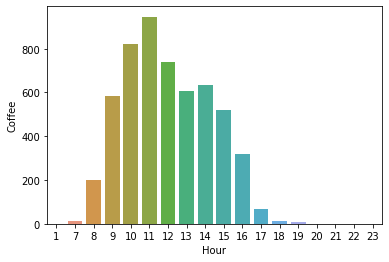

In [104]:
coffee_day = bakery.groupby('Hour')['Item'].apply(lambda x: x[x=="Coffee"].count()).reset_index()
graph = sns.barplot(data=coffee_day, x="Hour", y="Item")
graph.set_ylabel('Coffee')

**Bread의 판매량 추이**

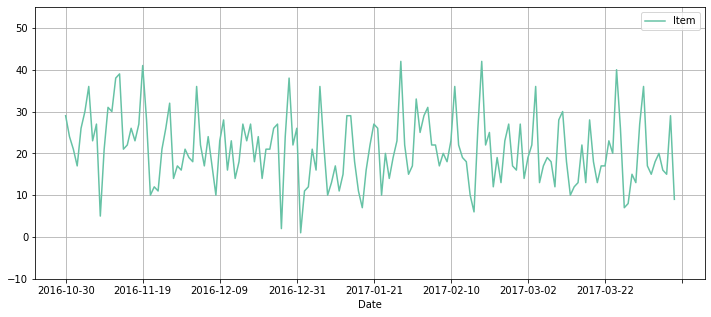

In [107]:
graph = bakery.groupby('Date')['Item'].apply(lambda x: x[x=="Bread"].count())

graph.plot(figsize=(12,5))
plt.ylim([-10,55])
plt.grid(True)
plt.legend()

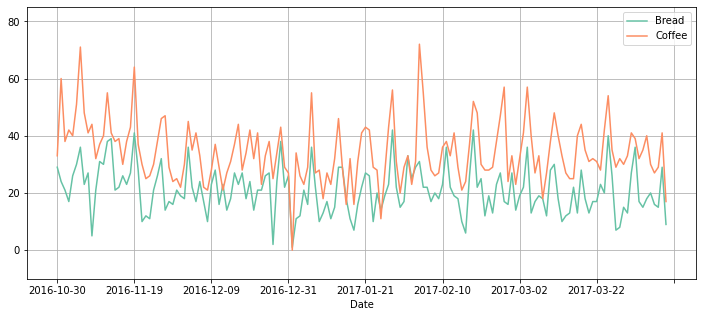

In [119]:
TC = bakery.groupby('Date')['Item'].apply(lambda x: x[x=="Bread"].count()).rename("Bread").to_frame()
TC["Coffee"] = bakery.groupby("Date")["Item"].apply(lambda x: x[x=="Coffee"].count())

TC.plot(figsize=(12,5))
plt.ylim([-10,85])
plt.grid(True)
plt.legend()

Text(0, 0.5, 'Bread')

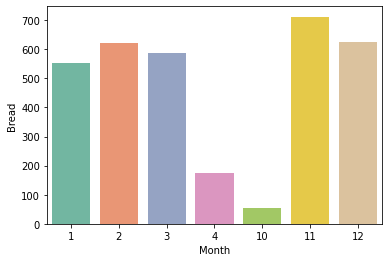

In [109]:
bread_month = bakery.groupby('Month')['Item'].apply(lambda x: x[x=="Bread"].count()).reset_index()
graph = sns.barplot(data=bread_month, x="Month", y="Item")
graph.set_ylabel('Bread')

Text(0, 0.5, 'Bread')

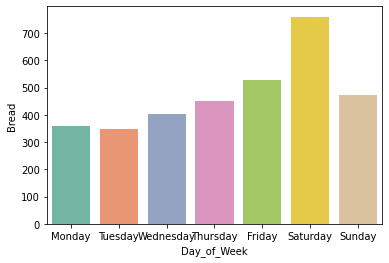

In [113]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
bread_day = bakery.groupby('Day_of_Week')['Item'].apply(lambda x: x[x=="Bread"].count()).reindex(days).reset_index()
graph = sns.barplot(data=bread_day, x="Day_of_Week", y="Item")
graph.set_ylabel('Bread')

Text(0, 0.5, 'Bread')

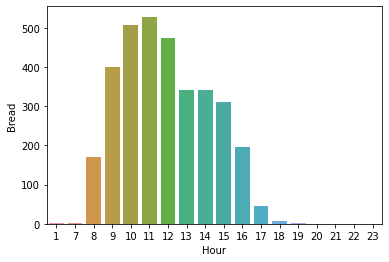

In [111]:
bread_day = bakery.groupby('Hour')['Item'].apply(lambda x: x[x=="Bread"].count()).reset_index()
graph = sns.barplot(data=bread_day, x="Hour", y="Item")
graph.set_ylabel('Bread')

**Tea의 판매량 추이**

Text(0, 0.5, 'Tea')

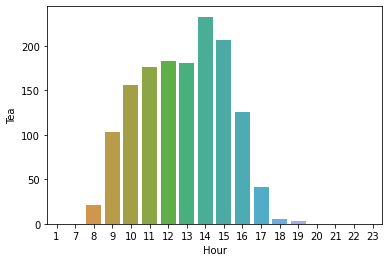

In [114]:
tea_day = bakery.groupby('Hour')['Item'].apply(lambda x: x[x=="Tea"].count()).reset_index()
graph = sns.barplot(data=tea_day, x="Hour", y="Item")
graph.set_ylabel('Tea')

**Cake의 판매량 추이**

Text(0, 0.5, 'Cake')

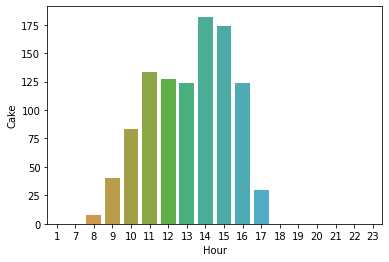

In [116]:
cake_day = bakery.groupby('Hour')['Item'].apply(lambda x: x[x=="Cake"].count()).reset_index()
graph = sns.barplot(data=cake_day, x="Hour", y="Item")
graph.set_ylabel('Cake')

**Pastry의 판매량 추이**

Text(0, 0.5, 'Pastry')

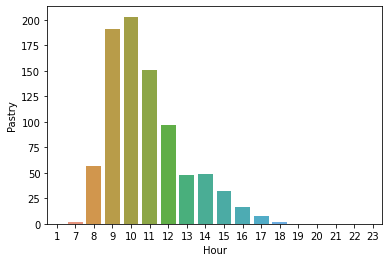

In [115]:
pastry_day = bakery.groupby('Hour')['Item'].apply(lambda x: x[x=="Pastry"].count()).reset_index()
graph = sns.barplot(data=pastry_day, x="Hour", y="Item")
graph.set_ylabel('Pastry')

Data only from the 30th October 2016 to the 9th of March 2017
The bakery sales 96 different items in total, 85 are foods and 6 drinks as well as others for cancellations and adjustment
The bakery opens 7 days a week
It was closed only 4 days during the 6 month period. Those days were the 25th and 26th of December 2016 and the 1st and 2nd of January 2017
Coffee is the most sold item followed by bread
There are a few item that have been sold once or twice only, maybe there are worth stop selling those, or at least item that have a short life date
There is not enough data to make compare between seasons or months
Saturday is the busiest day of the week. Where there are more volume of sales around lunch and tea time. It could be that people prefer to eat lunch out with family or friends while doing shopping or other outdoor activities.
The busiest hours are from 10:00 to 14:00 all days.

## 5. Reference